In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/home/rayan/Downloads/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isnull().sum()

data = data.dropna(subset=['TotalCharges'])


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [10]:
data['DeviceProtection'].value_counts()

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

In [11]:
data['TechSupport'].value_counts()

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

In [12]:
data['StreamingTV'].value_counts()

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [13]:
data['Churn'].value_counts()
data['Churn'].value_counts(normalize=True)


Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

EDA


In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


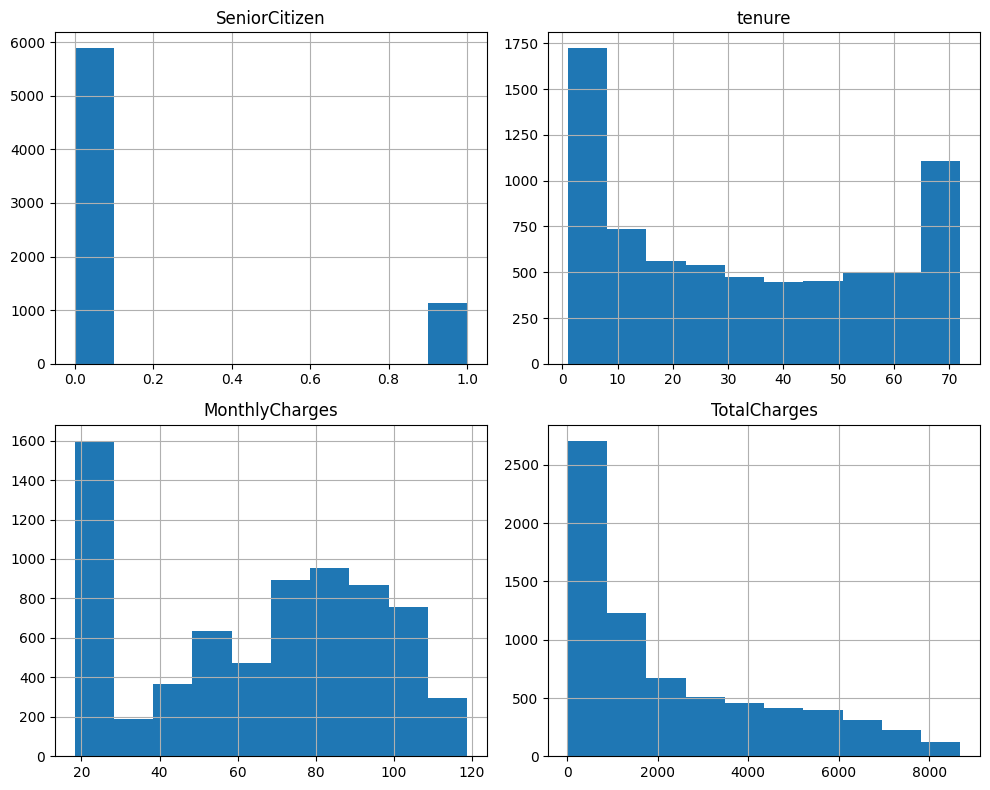

In [15]:
numeric_cols = data.select_dtypes(include="number").columns

data[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

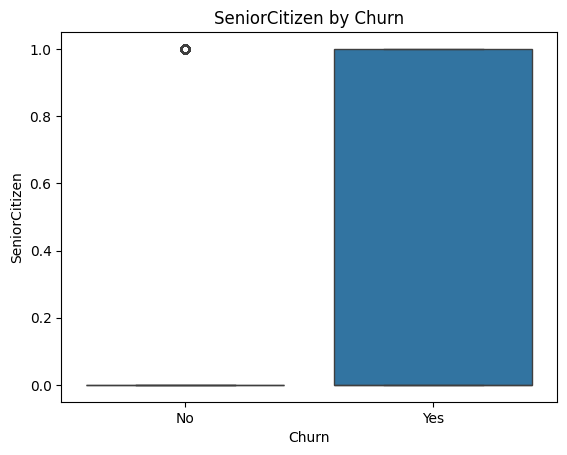

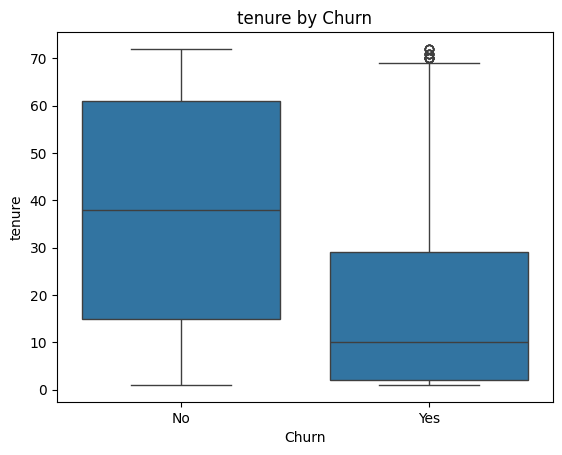

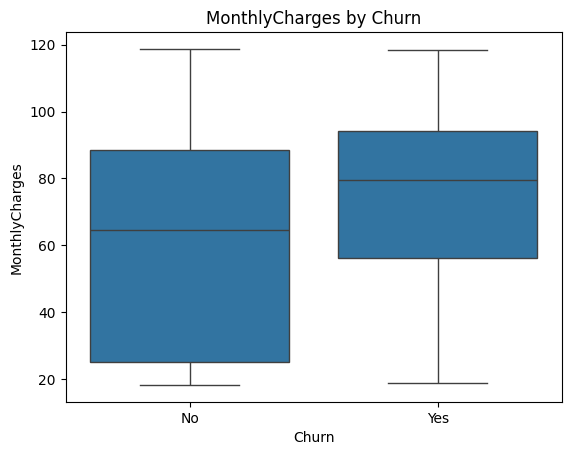

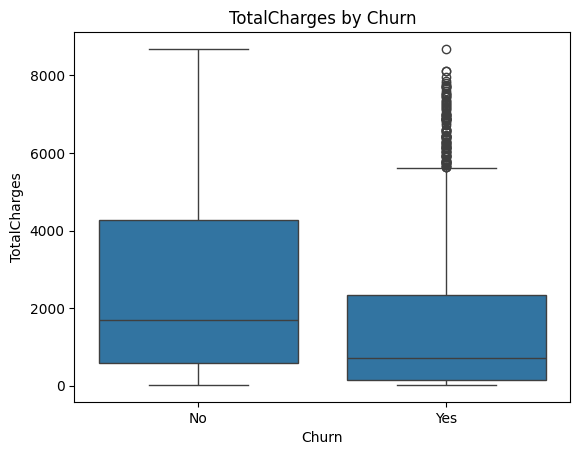

In [16]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x="Churn", y=col, data=data)
    plt.title(f"{col} by Churn")
    plt.show()

In [18]:
from scipy.stats import f_oneway

m2m = data[data["Contract"] == "Month-to-month"]["MonthlyCharges"]
one_year = data[data["Contract"] == "One year"]["MonthlyCharges"]
two_year = data[data["Contract"] == "Two year"]["MonthlyCharges"]

f_stat, p_value = f_oneway(m2m, one_year, two_year)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 19.99855605912632
p-value: 2.1845147673871253e-09


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=data["MonthlyCharges"],
    groups=data["Contract"],
    alpha=0.05
)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1      group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
Month-to-month One year  -1.3191 0.3225 -3.4726  0.8345  False
Month-to-month Two year  -5.5261    0.0 -7.5786 -3.4736   True
      One year Two year   -4.207 0.0003 -6.7165 -1.6976   True
--------------------------------------------------------------
